# 데이터 불러오기 & Resize하기

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os


In [2]:
def resize_images(img_path):
    images=glob.glob(img_path+'/*.jpg')
    
    print(len(images),'images to be resized')
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,'JPEG')
        
    print(len(images),'images resized')

        


s_dir_path= os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"       
resize_images(s_dir_path)
print('가위 resize 완료!')

r_dir_path= os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"       
resize_images(r_dir_path)
print('바위 resize 완료!')

p_dir_path= os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"       
resize_images(p_dir_path)
print('보 resize 완료!')

2000 images to be resized
2000 images resized
가위 resize 완료!
2014 images to be resized
2014 images resized
바위 resize 완료!
1998 images to be resized
1998 images resized
보 resize 완료!


# 데이터 로드하기

In [3]:
import numpy as np

def load_data(img_path, number_of_data): 
   
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=1   
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=2   
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,6012)
x_train_norm = x_train/255.0   

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 6012 입니다.
x_train shape: (6012, 28, 28, 3)
y_train shape: (6012,)


라벨:  0


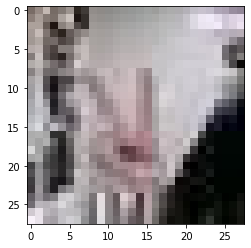

In [4]:
plt.imshow(x_train[1100])
print('라벨: ', y_train[1100])

# 딥러닝 네트워크 설계하기

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(128,(3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.4))



model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.4))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, kernel_regularizer='l2'))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  13


# 딥러닝 네트워크 학습시키기

In [6]:
x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3) 

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
188/188 [==============================] - 4s 5ms/step - loss: 1.4203 - accuracy: 0.3347
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 1.1082 - accuracy: 0.3330
Epoch 3/10
188/188 [==============================] - 1s 4ms/step - loss: 1.0829 - accuracy: 0.3911
Epoch 4/10
188/188 [==============================] - 1s 4ms/step - loss: 0.8206 - accuracy: 0.6364
Epoch 5/10
188/188 [==============================] - 1s 4ms/step - loss: 0.5865 - accuracy: 0.7774
Epoch 6/10
188/188 [==============================] - 1s 4ms/step - loss: 0.4557 - accuracy: 0.8338
Epoch 7/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3693 - accuracy: 0.8701
Epoch 8/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3071 - accuracy: 0.8969
Epoch 9/10
188/188 [==============================] - 1s 4ms/step - loss: 0.2678 - accuracy: 0.9092
Epoch 10/10
188/188 [==============================] - 1s 4ms/step - loss: 0.2370 - accuracy: 0.9248

# 테스트하기

In [8]:
s_test_dir_path=os.getenv("HOME")+"/aiffel/rock_scissor_paper/test/scissor"
resize_images(s_test_dir_path)
print('가위 resize 완료!')

r_test_dir_path=os.getenv("HOME")+"/aiffel/rock_scissor_paper/test/rock"
resize_images(r_test_dir_path)
print('바위 resize 완료!')

p_test_dir_path=os.getenv("HOME")+"/aiffel/rock_scissor_paper/test/paper"
resize_images(p_test_dir_path)
print('보 resize 완료!')

100 images to be resized
100 images resized
가위 resize 완료!
100 images to be resized
100 images resized
바위 resize 완료!
100 images to be resized
100 images resized
보 resize 완료!


In [9]:

test_dir_path=os.getenv("HOME")+"/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(test_dir_path,300)
x_test_norm = x_test/255.0   

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


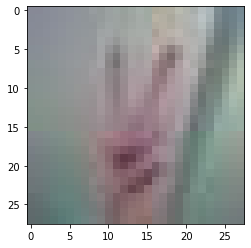

In [10]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [11]:
x_test_reshaped=x_test_norm.reshape(-1, 28, 28, 3) 
test_loss,test_accuracy=model.evaluate(x_test_reshaped,y_test, verbose=2)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


10/10 - 0s - loss: 0.8186 - accuracy: 0.6567
test_loss: 0.8186014294624329 
test_accuracy: 0.6566666960716248


# 회고

처음에 묵찌빠 각각 100장씩 찍어서 훈련시켰다. 모델의 하이퍼파라미터를 이리 바꾸고 저리 바꾸고 한참을 시도하였는데 여전히 정확도가 30%가 안넘었다. 아이펠 친구들이 묵찌빠 사진들을 올려주어서 거의 6000장이 되는 데이터들을 얻었다. 데이터양을 늘리고 그제서야 정확도가 올라가는 것을 확인했다. 학습할 데이터 양이 많을수록 좋다는 것을 느꼈다.